<a href="https://colab.research.google.com/github/shyampagadi/fastai/blob/master/Biriyani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#!curl https://course-v3.fast.ai/setup/colab | bash
from google.colab import files
files.upload()



Saving indian-mb.txt to indian-mb.txt
Saving paki-mb.txt to paki-mb.txt
Saving hyderabadi-mb.txt to hyderabadi-mb.txt


{'hyderabadi-mb.txt': b'https://5.imimg.com/data5/MJ/LF/GLADMIN-58304952/mutton-biryani-500x500.png\nhttps://recipes.timesofindia.com/thumb/62205611.cms?width=573&height=382\nhttps://c8.alamy.com/comp/J5711B/kashmiri-mutton-gosht-biryani-lamb-biryani-mutton-biryani-served-with-J5711B.jpg\nhttps://www.yummytummyaarthi.com/wp-content/uploads/2014/07/IMG_8907.jpg\nhttps://media-cdn.tripadvisor.com/media/photo-s/0a/fc/9a/f9/palnadu-mutton-biryani.jpg\nhttps://www.yummytummyaarthi.com/wp-content/uploads/2014/12/6-3.jpg\nhttps://i2.wp.com/www.indianhealthyrecipes.com/wp-content/uploads/2012/11/chicken-biryani-recipe.jpg?resize=450,300\nhttps://www.indianhealthyrecipes.com/wp-content/uploads/2016/05/hyderabadi-mutton-biryani-recipe.jpg\nhttps://www.whiskaffair.com/wp-content/uploads/2018/02/Hyderabadi-Mutton-Biryani-6.jpg\nhttps://yummyindiankitchen.com/wp-content/uploads/2015/10/hyderabadi-mutton-biryani-recipe.jpg\nhttps://i2.wp.com/kalimirchbysmita.com/wp-content/uploads/2017/09/Hyderabadi

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
folder = 'hyderabad-mb'
file = 'hyderabadi-mb.txt'

In [0]:
folder = 'pakistan-mb'
file = 'paki-mb.txt'

In [0]:
folder = 'indian-mb'
file = 'indian-mb.txt'

In [0]:
path = Path('data1/bir')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['hyderabad-mb','pakistan-mb','indian-mb']

In [0]:
mv indian-mb.txt paki-mb.txt hyderabadi-mb.txt data1/bir

In [34]:
download_images(path/file, dest, max_pics=2000)

Error https://eatmeerecipes.co.za/wp-content/uploads/2017/01/31.jpg HTTPSConnectionPool(host='eatmeerecipes.co.za', port=443): Max retries exceeded with url: /wp-content/uploads/2017/01/31.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:841)'),))
Error https://www.samsurge.com/wp-content/uploads/2017/07/mutton-biryani-recipe-indian-style-600x600.jpg HTTPSConnectionPool(host='www.samsurge.com', port=443): Max retries exceeded with url: /wp-content/uploads/2017/07/mutton-biryani-recipe-indian-style-600x600.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:841)'),))
Error https://www.zaiqatv.com.pk/wp-content/uploads/2016/05/image36.jpg HTTPSConnectionPool(host='www.zaiqatv.com.pk', port=443): Max retries exceeded with url: /wp-content/uploads/2016/05/image36.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:841)'),))
Error htt

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [37]:
data.classes

['indian-mb', 'pakistan-mb', 'hyderabad-mb']

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [39]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['indian-mb', 'pakistan-mb', 'hyderabad-mb'], 3, 1337, 334)

In [41]:
learn = create_cnn(data, models.resnet50, metrics=error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 73321994.27it/s]


In [42]:
learn.fit_one_cycle(4)

Total time: 06:34
epoch  train_loss  valid_loss  error_rate
1      1.544332    1.416234    0.640719    (01:51)
2      1.391762    1.314425    0.628743    (01:34)
3      1.240419    1.263906    0.631737    (01:34)
4      1.136945    1.227915    0.646707    (01:34)



In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=299, num_workers=0).normalize(imagenet_stats)

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [46]:
learn.fit_one_cycle(4)

Total time: 09:07
epoch  train_loss  valid_loss  error_rate
1      1.459252    1.321802    0.613772    (02:45)
2      1.337520    1.366029    0.637725    (02:08)
3      1.204488    1.234289    0.640719    (02:07)
4      1.099695    1.215029    0.625749    (02:06)



In [0]:
interp = ClassificationInterpretation.from_learner(learn)

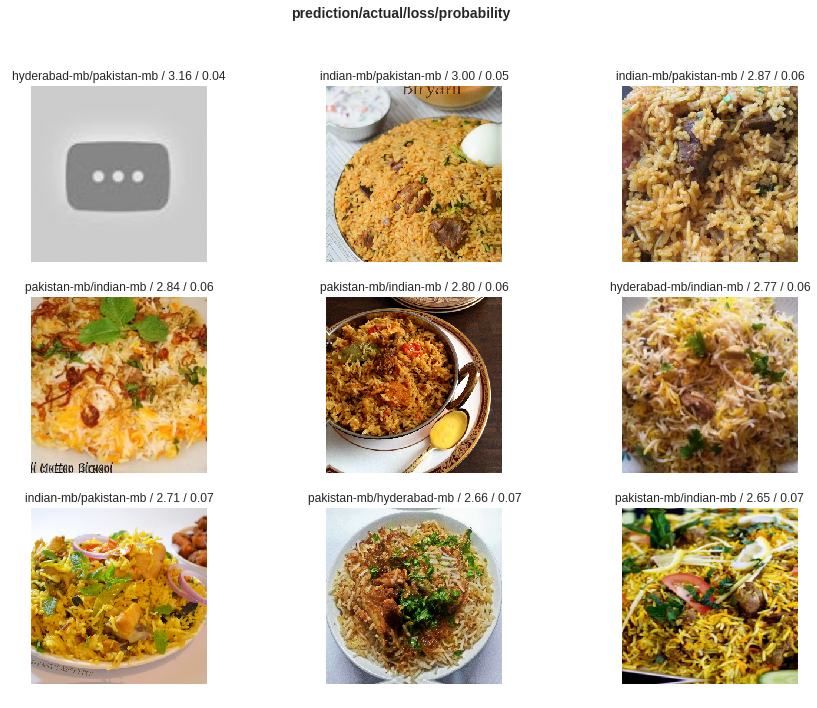

In [48]:
interp.plot_top_losses(9, figsize=(15,11))

In [49]:
interp.most_confused(min_val=2)

[('indian-mb', 'hyderabad-mb', 42),
 ('indian-mb', 'pakistan-mb', 37),
 ('pakistan-mb', 'indian-mb', 37),
 ('hyderabad-mb', 'pakistan-mb', 35),
 ('pakistan-mb', 'hyderabad-mb', 31),
 ('hyderabad-mb', 'indian-mb', 27)]

In [0]:
learn.unfreeze()

In [51]:
learn.fit_one_cycle(1)

Total time: 02:29
epoch  train_loss  valid_loss  error_rate
1      1.203582    1.253654    0.646707    (02:29)



In [52]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


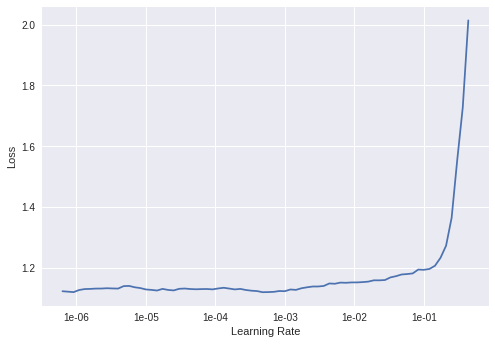

In [53]:
learn.recorder.plot()

In [54]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Total time: 04:38
epoch  train_loss  valid_loss  error_rate
1      1.131420    1.127979    0.640719    (02:19)
2      1.111405    1.121668    0.619760    (02:19)



In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=299, num_workers=0).normalize(imagenet_stats)

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [57]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))

Total time: 23:05
epoch  train_loss  valid_loss  error_rate
1      1.477142    1.193087    0.664671    (02:20)
2      1.454945    1.222951    0.655689    (02:19)
3      1.392663    1.205233    0.640719    (02:18)
4      1.337474    1.216092    0.607784    (02:18)
5      1.301734    1.201566    0.616766    (02:18)
6      1.274594    1.215996    0.613772    (02:19)
7      1.233273    1.220104    0.583832    (02:17)
8      1.193816    1.219195    0.622755    (02:17)
9      1.168820    1.218342    0.619760    (02:16)
10     1.141765    1.218977    0.619760    (02:18)

